In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
report=pd.read_csv('C:/Users/zhouq/Documents/optimal_transport/report_postprocess_baryrace.csv')
performance=list(report.columns)[:-1]
methods=['origin','baseline','partial repair2','partial repair3','barycentre'] #,'partial repair4','barycentre'
#list(set(report['method']))
colors=['#5f0f40','#9a031e','#FF8811','#F4D06F','red'] #' dark purple
pivot=pd.pivot_table(report,index=['method'],values=performance,aggfunc=[np.mean,np.std])
pivot

mean                                              \
                       DI TV distance  f1 macro  f1 micro f1 weighted   
method                                                                  
barycentre       0.842905    0.000077  0.550591  0.677101    0.673688   
baseline         0.447834    0.190589  0.684355  0.817473    0.790515   
origin           0.447834    0.190732  0.684355  0.817473    0.790515   
partial repair2  0.857545    0.098429  0.651675  0.755243    0.749793   
partial repair3  0.963455    0.025525  0.634601  0.721363    0.726575   

                      std                                              
                       DI TV distance  f1 macro  f1 micro f1 weighted  
method                                                                 
barycentre       0.185338    0.000126  0.022164  0.029478    0.021427  
baseline         0.030644    0.007766  0.007041  0.002420    0.004098  
origin           0.030644    0.007776  0.007041  0.002420    0.004098  
partial repair2  0.103489    0.004846  0.014233  0.022566    0.015248  
partial repair3  0.048104    0.001197  0.013444  0.019168    0.014157

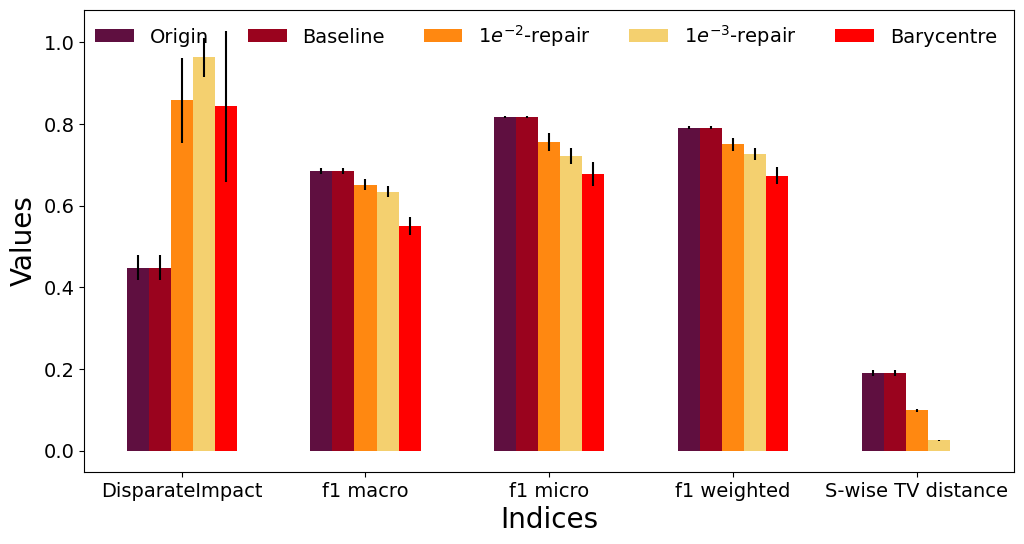

In [3]:
ind=np.arange(len(performance))
width = 0.12

fig, ax1 = plt.subplots(figsize=(12,6))

i=0
for m in methods:
    sub=[pivot[('mean',p)][m] for p in performance]
    err=[pivot[('std',p)][m] for p in performance]
    ax1.bar(ind+width*i,sub,width,yerr=err,color=colors[i],label=m)
    i+=1
    
ax1.legend(['Origin','Baseline',r'$1e^{-2}$-repair',r'$1e^{-3}$-repair','Barycentre'],fontsize=14,
            framealpha=0.2,bbox_to_anchor=(1.0,1.01),ncol=5,frameon=False)
ax1.set_xlabel('Indices', fontsize=20)
ax1.set_ylabel('Values', fontsize=20)

ax1.set_xticks(ind+width*2)
ax1.set_xticklabels(['DisparateImpact']+[i for i in performance[1:-1]]+['S-wise TV distance'], fontsize=14)
ax1.tick_params(axis='y', which='major', labelsize=14)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.savefig("C:/Users/zhouq/Documents/optimal_transport/adult_higher_race.pdf",bbox_inches='tight')